This is a supplementary sage notebook for the paper "Inequalities involving polynomials and quasimodular forms". 

In [1]:
from posqmf import *

# Depth 1 extremal quasimodular forms

In [2]:
@lru_cache(None)
def alpha0(w):
    assert w >= 6 and w % 2 == 0, "w must be an even integer >= 6"
    if w == 6:
        return -1/720
    elif w % 6 == 2:
        return - (w - 3) / (w - 1) * alpha0(w - 2)
    elif w % 6 == 4:
        return alpha0(w - 4)
    else:  # w % 6 == 0 and w >= 12
        return - (w - 6) * w / (432 * (w - 5) * (w - 1)) * alpha0(w - 6)

def beta0(w):
    return -alpha0(w + 2)

Sanity check for Lemma 2.6 for $w \le 200$.

In [3]:
for w in range(6, 200, 6):
    # Check constant terms
    X_w_1 = extremal_qm(w, 1)
    comps = modular_comp(X_w_1)
    A_w = comps[0]
    B_wm2 = comps[1]
    alpha_w_0 = qm_coefficients(A_w)[0]
    beta_wm2_0 = qm_coefficients(B_wm2)[0]
    assert alpha_w_0 == alpha0(w)
    assert beta_wm2_0 == beta0(w - 2)

    X_wp2_1 = extremal_qm(w + 2, 1)
    comps = modular_comp(X_wp2_1)
    A_wp2 = comps[0]
    B_w = comps[1]
    alpha_wp2_0 = qm_coefficients(A_wp2)[0]
    beta_w_0 = qm_coefficients(B_w)[0]
    assert alpha_wp2_0 == alpha0(w + 2)
    assert beta_w_0 == beta0(w)

    X_wp4_1 = extremal_qm(w + 4, 1)
    comps = modular_comp(X_wp4_1)
    A_wp4 = comps[0]
    B_wp2 = comps[1]
    alpha_wp4_0 = qm_coefficients(A_wp4)[0]
    beta_wp2_0 = qm_coefficients(B_wp2)[0]
    assert alpha_wp4_0 == alpha0(w + 4)
    assert beta_wp2_0 == beta0(w + 2)

    k = w / 6
    assert alpha0(w) == (-1)^k * factorial(k) * factorial(2*k) * factorial(3*k) / factorial(6*k) / 12 / k

$q$-expansions of modular components of $X_{12,1}$, $X_{14,1}$, and $X_{16,1}$, which are used in the proof of Lemma 2.7.

In [4]:
X_12_1 = extremal_qm(12, 1)
X_14_1 = extremal_qm(14, 1)
X_16_1 = extremal_qm(16, 1)

A_12 = modular_comp(X_12_1)[0]
B_10 = modular_comp(X_12_1)[1]
A_14 = modular_comp(X_14_1)[0]
B_12 = modular_comp(X_14_1)[1]
A_16 = modular_comp(X_16_1)[0]
B_14 = modular_comp(X_16_1)[1]

print_qm(A_12, "A_12")
print_qm(B_10, "B_10")
print_qm(A_14, "A_14")
print_qm(B_12, "B_12")
print_qm(A_16, "A_16")
print_qm(B_14, "B_14")

A_12

q_expansion 1/332640 - 1/1155*q + 471/770*q^2 + 8284/165*q^3 + 2767069/2310*q^4 + 153042/11*q^5 + 5691038/55*q^6 + 93003352/165*q^7 + 377247891/154*q^8 + 10331889643/1155*q^9 + 313709811/11*q^10 + 31311101796/385*q^11 + 34963464202/165*q^12 + 84291300454/165*q^13 + 63519092364/55*q^14 + 27121900472/11*q^15 + 11589512541853/2310*q^16 + 537307060374/55*q^17 + 14113152490147/770*q^18 + 1095783506588/33*q^19 + O(q^20) 

weight 12
depth 0
cusp order 0
polynomial (1/3991680) * (5*E4^3 + 7*E6^2) 

B_10

q_expansion -1/332640 + 1/1260*q + 57/140*q^2 + 703/45*q^3 + 262657/1260*q^4 + 15501/10*q^5 + 40071/5*q^6 + 10088402/315*q^7 + 2988453/28*q^8 + 387440173/1260*q^9 + 7952013/10*q^10 + 65498547/35*q^11 + 184647871/45*q^12 + 757464241/90*q^13 + 575038914/35*q^14 + 152560842/5*q^15 + 68853957121/1260*q^16 + 941173623/10*q^17 + 22084089861/140*q^18 + 2304912127/9*q^19 + O(q^20) 

weight 10
depth 0
cusp order 0
polynomial (-1/332640) * E4 * E6 

A_14

q_expansion -1/393120 + 1/16380*q + 2731/5

Sanity check for Lemma 2.7 for $w \le 200$.

In [5]:
for w in range(12, 200, 6):
    X_w_1 = extremal_qm(w, 1)
    comps = modular_comp(X_w_1)
    A_w = comps[0]
    B_wm2 = comps[1]
    alpha_w0, alpha_w1 = tuple(qm_coefficients(A_w, 2))
    beta_wm2_0, beta_wm2_1 = tuple(qm_coefficients(B_wm2, 2))
    assert alpha_w1 / alpha_w0 == - 12 * (w - 3) * (w + 4) / (w - 6)
    assert beta_wm2_1 / beta_wm2_0 == -12 * (w - 1) * w / (w - 6)

    X_wp2_1 = extremal_qm(w + 2, 1)
    comps_p2 = modular_comp(X_wp2_1)
    A_wp2 = comps_p2[0]
    B_w = comps_p2[1]
    alpha_wp2_0, alpha_wp2_1 = tuple(qm_coefficients(A_wp2, 2))
    beta_w_0, beta_w_1 = tuple(qm_coefficients(B_w, 2))
    assert alpha_wp2_1 / alpha_wp2_0 == -12 * (w^2 - 9*w - 24) / (w - 6)
    assert beta_w_1 / beta_w_0 == -12 * (w-12) * (w+1) / (w - 6)

    X_wp4_1 = extremal_qm(w + 4, 1)
    comps_p4 = modular_comp(X_wp4_1)
    A_wp4 = comps_p4[0]
    B_wm2_p4 = comps_p4[1]
    alpha_wp4_0, alpha_wp4_1 = tuple(qm_coefficients(A_wp4, 2))
    beta_wm2_p4_0, beta_wm2_p4_1 = tuple(qm_coefficients(B_wm2_p4, 2))
    assert alpha_wp4_1 / alpha_wp4_0 == -12 * (w^2 - 19*w + 108) / (w - 6)
    assert beta_wm2_p4_1 / beta_wm2_p4_0 == -12 * (w^2 - 21*w + 120) / (w - 6)

# Monotonicity results

## Lambert series approaches

### Monotonicity of $t^2(1 - E_2(it))$

From Lambert series expansion, it is enough to show the monotonicity of
$$
g_2(t) = t^2 \frac{e^{-t}}{(1 - e^{-t})^2}
$$

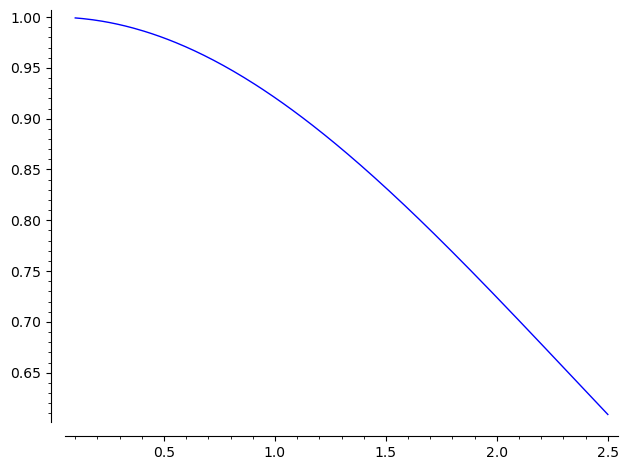

In [6]:
g2 = t^2 * exp(-t) / (1 - exp(-t))^2
plot(g2, (t, 0.1, 2.5))

In [7]:
dg2 = diff(g2, t)
print(dg2.factor())

assert dg2 == -t * exp(t) * ((t-2) * exp(t) + t + 2) / (exp(t) - 1)^3

-(t*e^t + t - 2*e^t + 2)*t*e^t/(e^t - 1)^3


Here's a plot of $t^2 (1 - E_2(it))$.

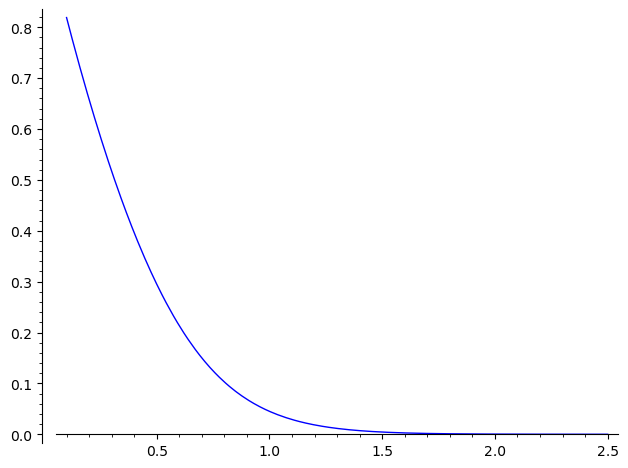

In [8]:
f_E2 = t^2 * (1 - qm_to_func(E2))
plot(f_E2, (t, 0.1, 2.5))

### Monotonicity of $t^3 X_{4, 2}(it)$

From Lambert series expansion, it is enough to show the monotonicity of
$$
g_3(t) = t^3 \frac{e^{-t}(1 + e^{-t})}{(1 - e^{-t})^3}
$$

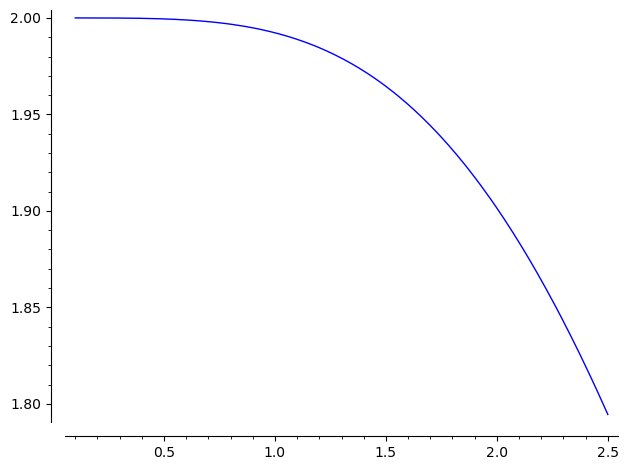

In [9]:
g3 = t^3 * exp(-t) * (1 + exp(-t)) / (1 - exp(-t))^3
plot(g3, (t, 0.1, 2.5))

In [10]:
dg3 = diff(g3, t)
print(dg3.factor())
num_g3 = t * (exp(2*t) + 4*exp(t) + 1) - 3 * (exp(2*t) - 1)
assert - exp(t) * t^2 * num_g3 / (exp(t) - 1)^4 == dg3

h3 = t / 3 - (exp(2 * t) - 1) / (exp(2 * t) + 4 * exp(t) + 1)
dh3 = diff(h3, t)
print(dh3.factor())
assert (exp(t) - 1)^4 / (3 * (exp(2*t) + 4*exp(t) + 1)^2) == dh3

-(t*e^(2*t) + 4*t*e^t + t - 3*e^(2*t) + 3)*t^2*e^t/(e^t - 1)^4
1/3*(e^t - 1)^4/(e^(2*t) + 4*e^t + 1)^2


Here's a plot of $t \mapsto t^3 X_{4, 2}(it)$.

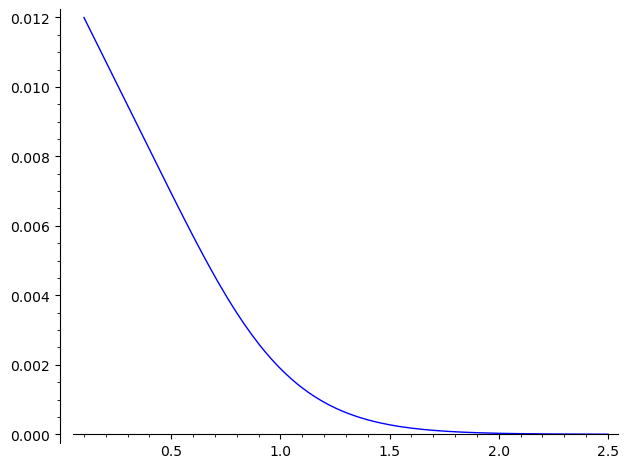

In [11]:
X_4_2 = extremal_qm(4, 2)
f_4_2 = t^3 * qm_to_func(X_4_2)
plot(f_4_2, (t, 0.1, 2.5))

### Monotonicity of $t^2 (E_2(2it) - E_2(it))$

From Lambert series expansion, it is enough to show the monotonicity of
$$
g_{2, 2}(t) := t^2 \left(\frac{e^{-t}}{(1 - e^{-t})^2} - \frac{e^{-2t}}{(1 - e^{-2t})^2}\right)
$$

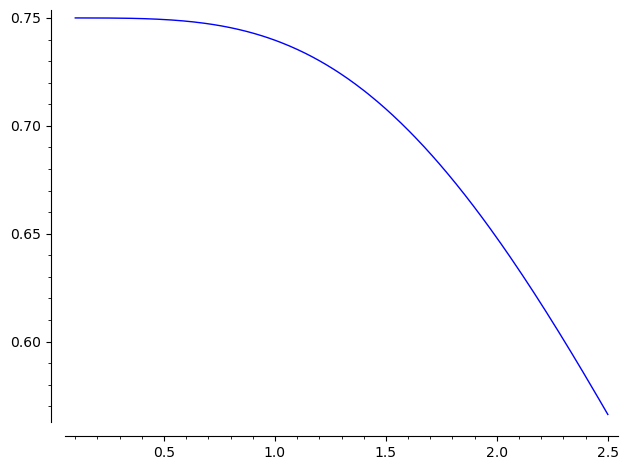

In [12]:
g22 = t^2 * (exp(-t) / (1 - exp(-t))^2 - exp(-2*t) / (1 - exp(-2*t))^2)
plot(g22, (t, 0.1, 2.5))

In [13]:
dg22 = diff(g22, t)
print(dg22.factor())
numer_22 = t * (exp(4*t) + 2 * exp(3*t) + 6 * exp(2*t) + 2 * exp(t) + 1) - 2 * (exp(t) + 1) * (exp(3*t) - 1)

h22 = t/2 - (exp(t) + 1) * (exp(3*t) - 1) / (exp(4*t) + 2 * exp(3*t) + 6 * exp(2*t) + 2 * exp(t) + 1)
assert dg22 == -2 * t * exp(t) * (exp(4*t) + 2 * exp(3*t) + 6 * exp(2*t) + 2 * exp(t) + 1) * h22 / (exp(2*t) - 1)^3
dh22 = diff(h22, t)
print(dh22.factor())


-(t*e^(4*t) + 2*t*e^(3*t) + 6*t*e^(2*t) + 2*t*e^t + t - 2*e^(4*t) - 2*e^(3*t) + 2*e^t + 2)*t*e^t/((e^t + 1)^3*(e^t - 1)^3)
1/2*(e^(2*t) + 4*e^t + 1)*(e^t + 1)^2*(e^t - 1)^4/(e^(4*t) + 2*e^(3*t) + 6*e^(2*t) + 2*e^t + 1)^2


For the monotonicity results related to $X_{6, 1}$ and $X_{8, 1}$, we define the following function: for $k \ge 0$,
$$
S_k(t) := \sum_{n \ge 1} n^k e^{-nt}.
$$

In [14]:
def Sk(k):
    """
    S_k(t) = \sum_{n=1}^{\infty} n^k e^(-nt).
    Compute by using the recurrence relation, S_{k+1}(t) = -d/dt S_k(t).
    S_0(t) = 1/(1 - e^(-t)).
    """
    if k == 0:
        return 1/(1 - exp(-t))
    else:
        return -diff(Sk(k-1), t)

In [15]:
for k in range(10):
    print(f"S_{k}(t) = {Sk(k).factor()}")

S_0(t) = e^t/(e^t - 1)
S_1(t) = e^t/(e^t - 1)^2
S_2(t) = (e^t + 1)*e^t/(e^t - 1)^3
S_3(t) = (e^(2*t) + 4*e^t + 1)*e^t/(e^t - 1)^4
S_4(t) = (e^(2*t) + 10*e^t + 1)*(e^t + 1)*e^t/(e^t - 1)^5
S_5(t) = (e^(4*t) + 26*e^(3*t) + 66*e^(2*t) + 26*e^t + 1)*e^t/(e^t - 1)^6
S_6(t) = (e^(4*t) + 56*e^(3*t) + 246*e^(2*t) + 56*e^t + 1)*(e^t + 1)*e^t/(e^t - 1)^7
S_7(t) = (e^(6*t) + 120*e^(5*t) + 1191*e^(4*t) + 2416*e^(3*t) + 1191*e^(2*t) + 120*e^t + 1)*e^t/(e^t - 1)^8
S_8(t) = (e^(6*t) + 246*e^(5*t) + 4047*e^(4*t) + 11572*e^(3*t) + 4047*e^(2*t) + 246*e^t + 1)*(e^t + 1)*e^t/(e^t - 1)^9
S_9(t) = (e^(8*t) + 502*e^(7*t) + 14608*e^(6*t) + 88234*e^(5*t) + 156190*e^(4*t) + 88234*e^(3*t) + 14608*e^(2*t) + 502*e^t + 1)*e^t/(e^t - 1)^10


### Monotonicity of $t^6 X_{8, 1}(it)$

From Lambert series expansion, it is enough to show that the monotonicity of
$$
g_6(t) := t^t S_6(t) = t^6 \frac{e^{-t} (e^{-5t} + 57 e^{-4t} + 302 e^{-3t} + 302 e^{-2t} + 57 e^{-t} + 1)}{(1 - e^{-t})^7}
$$

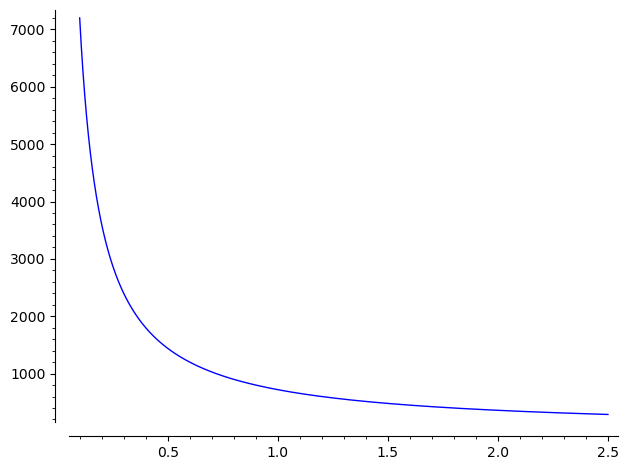

In [16]:
g6 = t^6 * Sk(6)
plot(g6, (t, 0.1, 2.5))

-(t*e^(6*t) + 120*t*e^(5*t) + 1191*t*e^(4*t) + 2416*t*e^(3*t) + 1191*t*e^(2*t) + 120*t*e^t + t - 6*e^(6*t) - 336*e^(5*t) - 1470*e^(4*t) + 1470*e^(2*t) + 336*e^t + 6)*t^5*e^t/(e^t - 1)^8


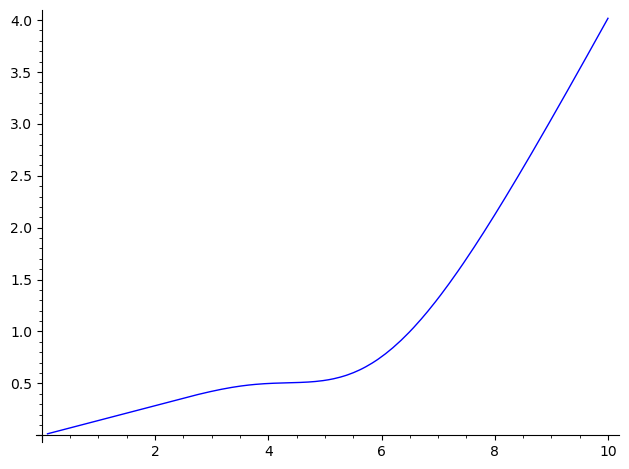

In [17]:
dg6 = diff(g6, t)
print(dg6.factor())

P = t^6 + 120 * t^5 + 1191 * t^4 + 2416 * t^3 + 1191 * t^2 + 120 * t + 1
Q = 6 * (t^6 + 56 * t^5 + 245 * t^4 - 245 * t^2 - 56 * t - 1)
Pexp = P.subs(t=exp(t))
Qexp = Q.subs(t=exp(t))

h6 = t - Qexp / Pexp
assert dg6 == -t^5 * exp(t) * Pexp * h6 / (exp(t) - 1)^8
plot(h6, (t, 0.1, 10))  # monotone increasing


In [18]:
dh6 = diff(h6, t)
dh6_ = dh6 * Pexp^2
print(dh6_.factor())

R = (t^6 - 72*t^5)^2 + (1 - 72*t)^2 + 246*(t^10 + t^2) + 23408*(t^9 + t^3) + 342687*(t^8 + t^4) + 754464*(t^7 + t^5) + 1377108*t^6
Rexp = R.subs(t=exp(t))
assert dh6_ == Rexp

e^(12*t) - 144*e^(11*t) + 5430*e^(10*t) + 23408*e^(9*t) + 342687*e^(8*t) + 754464*e^(7*t) + 1377108*e^(6*t) + 754464*e^(5*t) + 342687*e^(4*t) + 23408*e^(3*t) + 5430*e^(2*t) - 144*e^t + 1


Here is a plot of $t^6 X_{8, 1}(it)$.

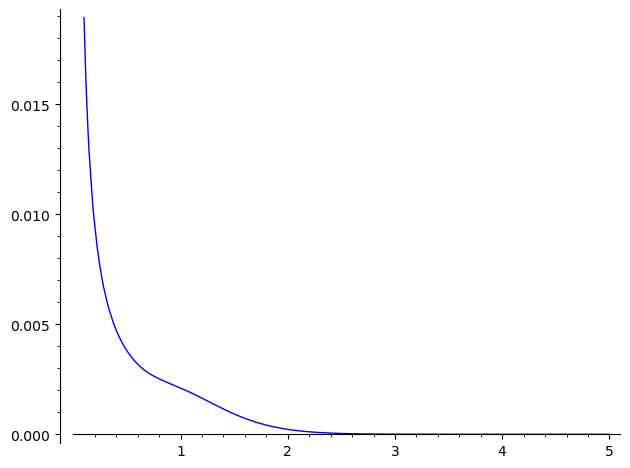

In [19]:
X_8_1 = extremal_qm(8, 1)
f_t6_X_8_1 = t^6 * qm_to_func(X_8_1)
plot(f_t6_X_8_1, (t, 0.1, 5.0))

Note that $t^7 X_{8, 1}(it)$ is not monotone.

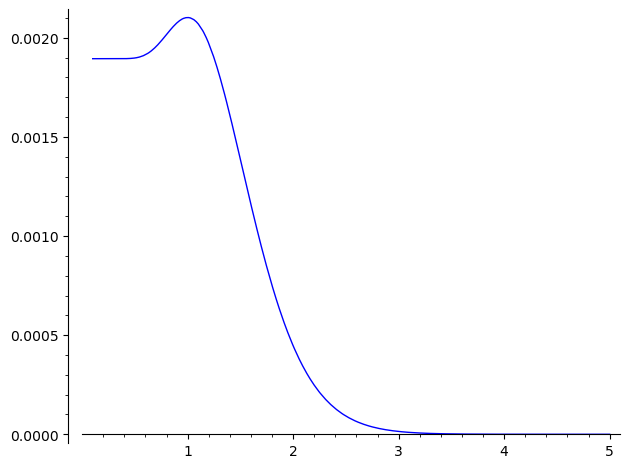

In [20]:
f_t7_X_8_1 = t^7 * qm_to_func(X_8_1)
plot(f_t7_X_8_1, (t, 0.1, 5.0))

### Monotonicity of $t^8 X_{10, 1}(it)$

From Lambert series expansion, it is enough to show the monotonicity of
$$
g_8(t) := t^8 S_8(t) = ^8 \frac{e^{-t} ((e^{-7t} + 1) + 247 (e^{-6t} + e^{-t}) + 4293 (e^{-5t} + e^{-2t}) + 15619 (e^{-4t} + e^{-3t}))}{(1 - e^{-t})^9}.
$$

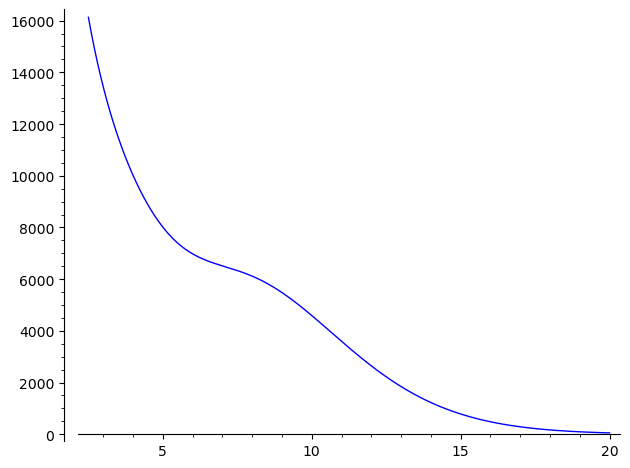

In [21]:
g8 = t^8 * Sk(8)
plot(g8, (t, 2.5, 20))

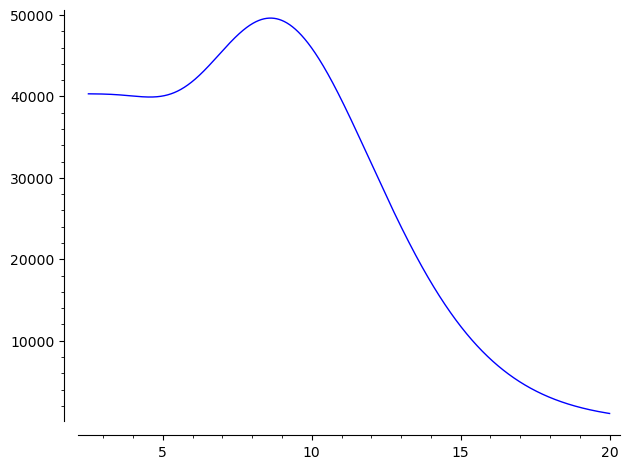

In [22]:
g9 = t^9 * Sk(8)
plot(g9, (t, 2.5, 20))

In [23]:
dg8 = diff(g8, t)
print(dg8.simplify_full())

P = t^8 + 502*t^7 + 14608*t^6 + 88234*t^5 + 156190*t^4 + 88234*t^3 + 14608*t^2 + 502*t + 1
Q = 8*t^8 + 1968*t^7 + 32368*t^6 + 90608*t^5 - 90608*t^3 - 32368*t^2 - 1968*t - 8
Pexp = P.subs(t=e^t)
Qexp = Q.subs(t=e^t)
print(Pexp.simplify_full())
print(Qexp.simplify_full())

# Verify the derivative formula
diff_check = - t^7 * (t * Pexp - Qexp) * e^(t) / (e^t - 1)^10 - dg8
assert diff_check.simplify_full() == 0

-(156190*t^8*e^(5*t) + (t^8 - 8*t^7)*e^(9*t) + 2*(251*t^8 - 984*t^7)*e^(8*t) + 16*(913*t^8 - 2023*t^7)*e^(7*t) + 2*(44117*t^8 - 45304*t^7)*e^(6*t) + 2*(44117*t^8 + 45304*t^7)*e^(4*t) + 16*(913*t^8 + 2023*t^7)*e^(3*t) + 2*(251*t^8 + 984*t^7)*e^(2*t) + (t^8 + 8*t^7)*e^t)/(e^(10*t) - 10*e^(9*t) + 45*e^(8*t) - 120*e^(7*t) + 210*e^(6*t) - 252*e^(5*t) + 210*e^(4*t) - 120*e^(3*t) + 45*e^(2*t) - 10*e^t + 1)
e^(8*t) + 502*e^(7*t) + 14608*e^(6*t) + 88234*e^(5*t) + 156190*e^(4*t) + 88234*e^(3*t) + 14608*e^(2*t) + 502*e^t + 1
8*e^(8*t) + 1968*e^(7*t) + 32368*e^(6*t) + 90608*e^(5*t) - 90608*e^(3*t) - 32368*e^(2*t) - 1968*e^t - 8


In [24]:
# Compute taylor expansion of f(t) = t P(t) - Q(t) = \sum_{n \ge 1} c(n) t^n / n!
R.<t> = PolynomialRing(QQ)
P_poly = R(P)
Q_poly = R(Q)

def c(n):
    s = 0
    for k in range(1, 9):
        s += (n * P_poly[k] - k * Q_poly[k]) * k^(n-1)
    if n == 1:
        s += 1
    return s

N = -1
for k in range(1, 9):
    N = max(N, k * Q_poly[k] / P_poly[k])
print(f"N = {N}")  # for n > N, the c(n) are guaranteed to be nonnegative
N = int(ceil(N))

for n in range(1, N + 1):
    print(f"c({n}) = {c(n)}")
    assert c(n) >= 0

N = 64
c(1) = 40320
c(2) = 322560
c(3) = 2036160
c(4) = 11934720
c(5) = 68140800
c(6) = 386426880
c(7) = 2196865440
c(8) = 12579517440
c(9) = 72731655360
c(10) = 425141337600
c(11) = 2513898868320
c(12) = 15039893352960
c(13) = 91031905687680
c(14) = 557309766343680
c(15) = 3449988801856800
c(16) = 21587682544404480
c(17) = 136495168951901760
c(18) = 871827016870494720
c(19) = 5624159286451891680
c(20) = 36639242915992819200
c(21) = 241029564146259033600
c(22) = 1601070031370483896320
c(23) = 10738193773037766809760
c(24) = 72703442032970562616320
c(25) = 496749825897395204491200
c(26) = 3423376621152422316910080
c(27) = 23779089427158513893823840
c(28) = 166329348976151521726487040
c(29) = 1170362141001599280365554560
c(30) = 8274643668229066542307353600
c(31) = 58712859415867979560315122720
c(32) = 417586772693084105750470594560
c(33) = 2973569262321847817020543375680
c(34) = 21175815072386767732881724500480
c(35) = 150652603720713668040147721471200
c(36) = 10697042961001271197356044

Here is a plot of $t^8 X_{10,1}(it)$.

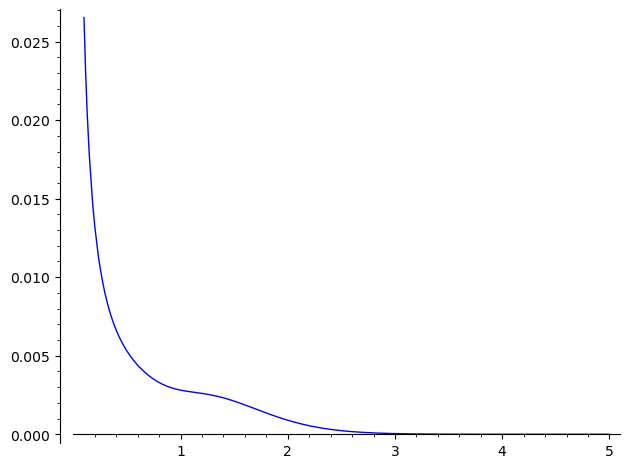

In [25]:
X_10_1 = extremal_qm(10, 1)
f_t8_X_10_1 = t^8 * qm_to_func(X_10_1)
plot(f_t8_X_10_1, (t, 0.1, 5.0))

Note that $t^9 X_{10,1}(it)$ is not monotone.

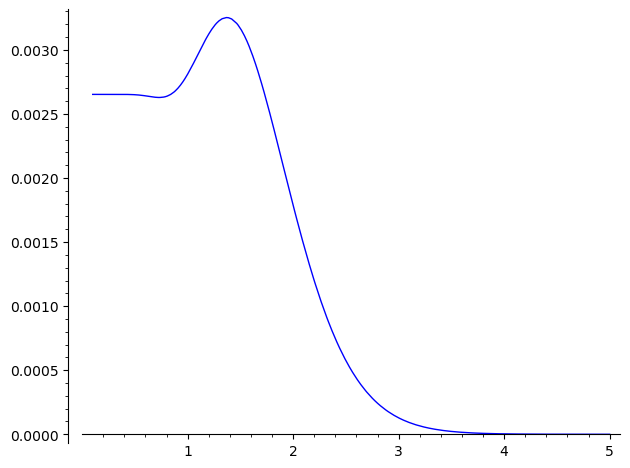

In [26]:
f_t9_X_10_1 = t^9 * qm_to_func(X_10_1)
plot(f_t9_X_10_1, (t, 0.1, 5.0))

## Using Proposition 3.7

### Monotonicity of $t^5 X_{6, 1}(it)$

Monotonocity follows from the limit computation and the identity
$$
6 (X_{6, 1}')^2 - 5 X_{6, 1}'' X_{6, 1} = \Delta X_{4, 2}
$$

In [27]:
X_6_1 = extremal_qm(6, 1)
DX_6_1 = X_6_1.derivative()
DDX_6_1 = DX_6_1.derivative()
X_4_2 = extremal_qm(4, 2)

aux_6_1 = 6 * DX_6_1^2 - 5 * DDX_6_1 * X_6_1
print_qm(aux_6_1, "12 * (X_6,1')^2 - 11 * (X_6,1'') * X_6,1")
assert aux_6_1 == Disc * X_4_2

12 * (X_6,1')^2 - 11 * (X_6,1'') * X_6,1

q_expansion q^2 - 18*q^3 + 120*q^4 - 220*q^5 - 1620*q^6 + 11676*q^7 - 30400*q^8 + 19440*q^9 + 73230*q^10 - 141350*q^11 + 22176*q^12 - 296268*q^13 + 1701560*q^14 - 1436940*q^15 - 5091840*q^16 + 11674176*q^17 - 5006043*q^18 - 7325370*q^19 + O(q^20) 

weight 16
depth 2
cusp order 2
polynomial (-1/497664) * (-E2^2 + E4) * (-E4^3 + E6^2) 



### Monotonicity of $t^{11} X_{12, 1}(it)$

Monotonicity follows from the limit computation and the identity
$$
12 (X_{12, 1}')^2 - 11 X_{12, 1}'' X_{12, 1} = \frac{1}{2^{10} \cdot 3^{6} \cdot 5^{2} \cdot 7^{2}} \cdot \Delta F.
$$
where
$$
F = 49 E_2^2 E_4^3 - 25 E_2^2 E_6^2 - 48 E_2 E_4^2 E_6 - 25 E_4^4 + 49 E_4 E_6^2
$$

In [28]:
X_12_1 = extremal_qm(12, 1)
DX_12_1 = X_12_1.derivative()
DDX_12_1 = DX_12_1.derivative()

aux_12_1 = 12 * DX_12_1 ^ 2 - 11 * DDX_12_1 * X_12_1
print_qm(aux_12_1, "12 * (X_12,1')^2 - 11 * (X_12,1'') * X_12,1")

F = (49*E2^2*E4^3 - 25*E2^2*E6^2 - 48*E2*E4^2*E6 - 25*E4^4 + 49*E4*E6^2)
assert aux_12_1 == 1 / (2^10 * 3^6 * 5^2 * 7^2) * Disc * F


12 * (X_12,1')^2 - 11 * (X_12,1'') * X_12,1

q_expansion 4*q^4 + 56*q^5 + 168*q^6 - 4928*q^7 + 4384*q^8 + 76464*q^9 - 121744*q^10 + 41536*q^11 - 3998736*q^12 + 16213624*q^13 - 12220208*q^14 - 691008*q^15 - 170570496*q^16 + 605663408*q^17 - 1208530368*q^18 + 3079105344*q^19 + O(q^20) 

weight 28
depth 2
cusp order 4
polynomial (-1/1580182732800) * (-E4^3 + E6^2) * (49*E2^2*E4^3 - 25*E2^2*E6^2 - 48*E2*E4^2*E6 - 25*E4^4 + 49*E4*E6^2) 



Note that the monotonicity of this function is equivalent to the inequality (3b) of Cohn-Kumar-Miller-Radchenk-Viazovska's paper "Universal optimality of the $\mathrm{E}_8$ and Leech lattices and interpolation formulas". Define
\begin{align*}
    \widehat{\mathcal{E}}_{1, 0} &= 12 \pi i (-E_2 E_4 E_6 + E_6^2 + 720 \Delta) \\
    \widehat{\mathcal{E}}_{1, 1} &= 2 \pi^2 (E_2^2 E_4 E_6 - 2 E_2 E_6^2 - 1728 E_2 \Delta + E_4^2 E_6) \\
    \widehat{\mathcal{E}}_{1}(\tau) &= \tau \widehat{\mathcal{E}}_{1, 1}(\tau) + \widehat{\mathcal{E}}_{1, 0}(\tau).
\end{align*}
then the inequality is $i \widehat{\mathcal{E}}_1(it) > 0$ for all $t > 0$.

### Monotonicity of $t^{13} X_{14, 1}(it)$

Monotonicity follows from the limit computation and the identity
$$
14 (X_{14, 1}')^2 - 13 X_{14, 1}'' X_{14, 1} = 4 \Delta^2 X_{8, 2}.
$$

In [29]:
X_14_1 = extremal_qm(14, 1)
DX_14_1 = X_14_1.derivative()
DDX_14_1 = DX_14_1.derivative()
X_8_2 = extremal_qm(8, 2)

aux_14_1 = 14 * DX_14_1 ^ 2 - 13 * DDX_14_1 * X_14_1
print_qm(aux_14_1, "14 * (X_14,1') - 13 * (X_14,1'') * X_14,1")

assert aux_14_1 == 4 * Disc^2 * X_8_2

14 * (X_14,1') - 13 * (X_14,1'') * X_14,1

q_expansion 4*q^4 - 128*q^5 + 1656*q^6 - 8960*q^7 - 21280*q^8 + 684288*q^9 - 4972528*q^10 + 17223680*q^11 - 6607440*q^12 - 221786240*q^13 + 1067785712*q^14 - 2220800256*q^15 + 815953152*q^16 + 5019685120*q^17 - 1839412800*q^18 - 22470687744*q^19 + O(q^20) 

weight 32
depth 2
cusp order 4
polynomial (1/270888468480) * (-7*E2^2*E4 + 2*E2*E6 + 5*E4^2) * (-E4^3 + E6^2)^2 



# Inequality for the optimality of Leech lattice packing

Using the level $\Gamma_0(2)$ positive quasimodular forms constructed above, we give another proof of the positivity of $\mathcal{L}_{1, 0} = F' G - F G'$ (i.e. monotonicity of $F(it) / G(it)$) appear in the paper "Algebraic proof of modular form inequalities for optimal sphere packings".

In [30]:
F = 49 * E2^2 * E4^3 - 25 * E2^2 * E6^2 - 48 * E2 * E4^2 * E6 - 25 * E4^4 + 49 * E4 * E6^2
print_qm(F, "F")

G = H2^5 * (2 * H2^2 + 7 * H2 * H4 + 7 * H4^2)
print_qm2(G, "G")

F_ = l1_to_l2(F)

L_1_0 = qm2_derivative(F_) * G - F_ * qm2_derivative(G)
print_qm2(L_1_0, "L_1_0")

K10 = -2 * (23 * H2^4 + 46 * H2^3 * H4 + 54 * H2^2 * H4^2 + 16 * H2 * H4^3 + 8 * H4^4) * (H2 + 2 * H4)
K12 = -2 * (10 * H2^4 + 35 * H2^3 * H4 + 3 * H2^2 * H4^2 -64 * H2 * H4^3 -32 * H4^4) * (H2^2 + H2 * H4 + H4^2)
K14 = (26 * H2^6 + 78 * H2^5 * H4 + 177 * H2^4 * H4^2 + 182 * H2^3 * H4^3 + 51 * H2^2 * H4^4 - 48 * H2 * H4^5 - 16 * H4^6) * (H2 + 2 * H4)

print_qm2(K10, "K10")
print_qm2(K12, "K12")
print_qm2(K14, "K14")

L_fac = K10 * E2_^2 + K12 * E2_ + K14
print_qm2(L_fac, "L_fac")

assert L_1_0 == (105 / 8) * H4^2 * (H2 + H4)^2 * H2^5 * L_fac

F

q_expansion 3657830400*q^3 + 138997555200*q^4 + 2567796940800*q^5 + 27477621964800*q^6 + 203324160614400*q^7 + 1155903669043200*q^8 + 5339174090342400*q^9 + 21015084264652800*q^10 + 72521005100544000*q^11 + 224861553797529600*q^12 + 636227181370368000*q^13 + 1668067755850137600*q^14 + 4088240185030041600*q^15 + 9465006273911193600*q^16 + 20805434866660147200*q^17 + 43762572956919398400*q^18 + 88336945205133004800*q^19 + O(q^20) 

weight 16
depth 2
cusp order 3
polynomial 49*E2^2*E4^3 - 25*E2^2*E6^2 - 48*E2*E4^2*E6 - 25*E4^4 + 49*E4*E6^2 

G

q_expansion 7340032*qh^5 + 566231040*qh^7 + 14900264960*qh^9 + 202291281920*qh^11 + 1774709637120*qh^13 + 11404383879168*qh^15 + 58038146826240*qh^17 + 246418086297600*qh^19 + 905169579540480*qh^21 + 2953520097525760*qh^23 + 8731672090509312*qh^25 + 23746909873111040*qh^27 + 60124559766978560*qh^29 + Order(qh^30) 

weight 14
depth 0
cusp order 5/2
polynomial H2^5 * (2*H2^2 + 7*H2*H4 + 7*H4^2) 

L_1_0

q_expansion 13424296093286400*qh^11 + 494781

The above monotonicity results imply that the following quasimodular forms are positive (but not completely positive):
\begin{align*}
    \widetilde{X}_{8, 2}(z) &:= X_{8, 2}(z) - 2^{7} X_{8, 2}(2z)  \\
    \widetilde{X}_{10, 2}(z) &:= X_{10, 2}(z) - 2^{9} X_{10, 2}(2z) \\
    \widetilde{X}_{12, 2}(z) &:= X_{12, 2}(z) - 2^{11} X_{12, 2}(2z)  \\
    \widetilde{X}_{14, 2}(z) &:= X_{14, 2}(z) - 2^{13} X_{14, 2}(2z) 
\end{align*}

In [31]:
X_8_2 = extremal_qm(8, 2)
X_10_2 = extremal_qm(10, 2)
X_12_2 = extremal_qm(12, 2)
X_14_2 = extremal_qm(14, 2)

X_8_2_2z = double_argument(X_8_2)
X_10_2_2z = double_argument(X_10_2)
X_12_2_2z = double_argument(X_12_2)
X_14_2_2z = double_argument(X_14_2)

X_8_2_l2pos = l1_to_l2(X_8_2) - 2^7 * X_8_2_2z
X_10_2_l2pos = l1_to_l2(X_10_2) - 2^9 * X_10_2_2z
X_12_2_l2pos = l1_to_l2(X_12_2) - 2^11 * X_12_2_2z
X_14_2_l2pos = l1_to_l2(X_14_2) - 2^13 * X_14_2_2z

print_qm2(X_8_2_l2pos, "X_8,2(z) - 2^7 X_8,2(2z)")
print_qm2(X_10_2_l2pos, "X_10,2(z) - 2^9 X_10,2(2z)")
print_qm2(X_12_2_l2pos, "X_12,2(z) - 2^11 X_12,2(2z)")
print_qm2(X_14_2_l2pos, "X_14,2(z) - 2^13 X_14,2(2z)")

X_8,2(z) - 2^7 X_8,2(2z)

q_expansion 1*qh^4 + 16*qh^6 + (-26)*qh^8 + 416*qh^10 + (-740)*qh^12 + 3360*qh^14 + (-5284)*qh^16 + 15744*qh^18 + (-22642)*qh^20 + 53680*qh^22 + (-74072)*qh^24 + 148512*qh^26 + (-191464)*qh^28 + Order(qh^30) 

weight 8
depth 2
cusp order 2
polynomial (1/51840) * (H2^4 - 4*H2^3*H4 - 81*H2^2*H4^2 - 154*H2*H4^3 - 77*H4^4 + 2*H2^3*E2 + 27*H2^2*H4*E2 + 69*H2*H4^2*E2 + 46*H4^3*E2 + H2^2*E2^2 + 31*H2*H4*E2^2 + 31*H4^2*E2^2) 

X_10,2(z) - 2^9 X_10,2(2z)

q_expansion 1*qh^4 + 104/3*qh^6 + (-122)*qh^8 + 2480*qh^10 + (-19828/3)*qh^12 + 39216*qh^14 + (-82660)*qh^16 + 303680*qh^18 + (-551770)*qh^20 + 1546600*qh^22 + (-7672312/3)*qh^24 + 5976048*qh^26 + (-9137272)*qh^28 + Order(qh^30) 

weight 10
depth 2
cusp order 2
polynomial (1/435456) * (2*H2^5 - 13*H2^4*H4 + 434*H2^3*H4^2 + 1906*H2^2*H4^3 + 2425*H2*H4^4 + 970*H4^5 + 4*H2^4*E2 - 136*H2^3*H4*E2 - 852*H2^2*H4^2*E2 - 1432*H2*H4^3*E2 - 716*H4^4*E2 + 2*H2^3*E2^2 - 123*H2^2*H4*E2^2 - 381*H2*H4^2*E2^2 - 254*H4^3*E2^2) 

X_12,2

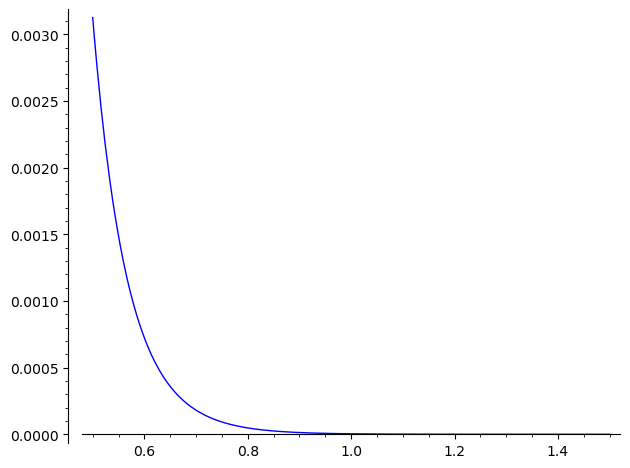

In [32]:
f82_l2 = qm2_to_func(X_8_2_l2pos)
plot(f82_l2, (t, 0.5, 1.5))

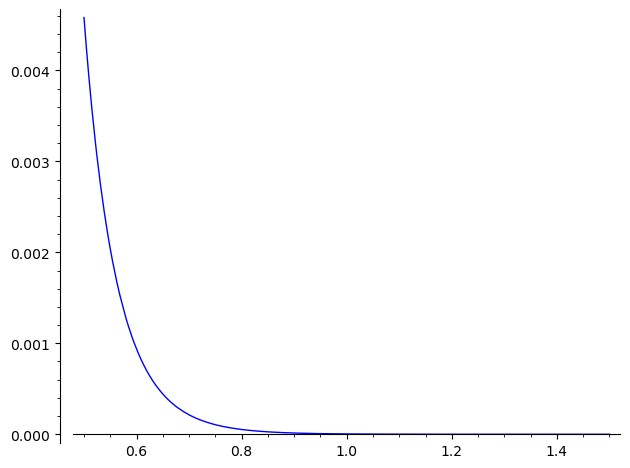

In [33]:
f102_l2 = qm2_to_func(X_10_2_l2pos)
plot(f102_l2, (t, 0.5, 1.5))

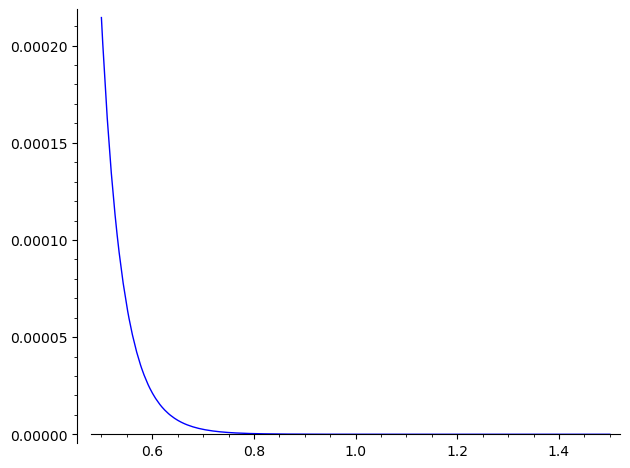

In [34]:
f122_l2 = qm2_to_func(X_12_2_l2pos)
plot(f122_l2, (t, 0.5, 1.5))

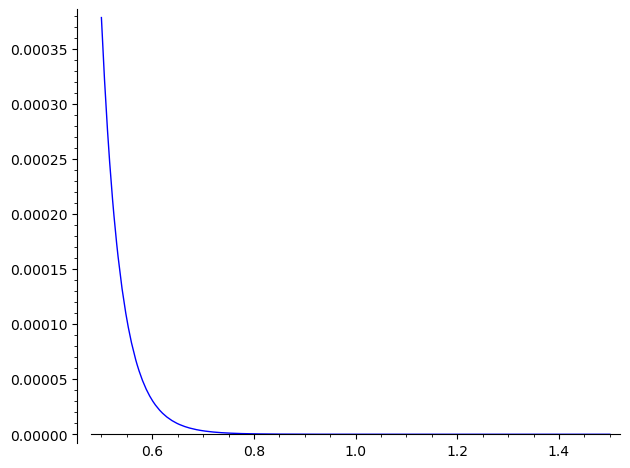

In [35]:
f142_l2 = qm2_to_func(X_14_2_l2pos)
plot(f142_l2, (t, 0.5, 1.5))

In [36]:
A = H2^2
B = H2 + 2 * H4

print_qm2(A, "H2^2")
print_qm2(B, "H2 + 2 * H4")

ls = [
    X_8_2_2z * A * B, X_8_2_l2pos * A * B,
    X_10_2_2z * A, X_10_2_l2pos * A,
    X_12_2_2z * B, X_12_2_l2pos * B
]
qm2_find_lin_comb(L_fac, ls)  # (78278400, 550800, 90823680, 116640, 678813696000, 331776000)

H2^2

q_expansion 256*qh^2 + 2048*qh^4 + 7168*qh^6 + 16384*qh^8 + 32256*qh^10 + 57344*qh^12 + 88064*qh^14 + 131072*qh^16 + 193792*qh^18 + 258048*qh^20 + 340992*qh^22 + 458752*qh^24 + 562688*qh^26 + 704512*qh^28 + Order(qh^30) 

weight 4
depth 0
cusp order 1
polynomial H2^2 

H2 + 2 * H4

q_expansion 2 + 48*qh^2 + 48*qh^4 + 192*qh^6 + 48*qh^8 + 288*qh^10 + 192*qh^12 + 384*qh^14 + 48*qh^16 + 624*qh^18 + 288*qh^20 + 576*qh^22 + 192*qh^24 + 672*qh^26 + 384*qh^28 + Order(qh^30) 

weight 2
depth 0
cusp order 0
polynomial H2 + 2*H4 



(78278400, 550800, 90823680, 116640, 678813696000, 331776000)

We have an alternative positive decomposition of `L_fac` using completely positive quasimodular forms of level $\Gamma_0(2)$, namely
\begin{align*}
Y_{8, 2}(z) &= X_{8, 2}(z) - 2^6 X_{8, 2}(2z) \\
Y_{10, 2}(z) &= X_{10, 2}(z) - 2^8 X_{10, 2}(2z) \\
Y_{12, 2}(z) &= X_{12, 2}(z) - 2^{10} X_{12, 2}(2z)
\end{align*}

In [37]:
Y_8_2 = l1_to_l2(X_8_2) - 2^6 * X_8_2_2z
Y_10_2 = l1_to_l2(X_10_2) - 2^8 * X_10_2_2z
Y_12_2 = l1_to_l2(X_12_2) - 2^10 * X_12_2_2z

print_qm2(Y_8_2, "Y_8,2")
print_qm2(Y_10_2, "Y_10,2")
print_qm2(Y_12_2, "Y_12,2")

# Express X_8_2, X_10_2, X_12_2 as linear combinations of derivatives of Eisenstein series and discriminant form
DE4 = E4.derivative()
DDE4 = DE4.derivative()
DE6 = E6.derivative()
DDE6 = DE6.derivative()
E8 = E4^2
DE8 = E8.derivative()
DDE8 = DE8.derivative()
E10 = E4 * E6
DE10 = E10.derivative()

assert X_8_2 == - DE6 / 15120 - DDE4 / 7200
assert X_10_2 == DE8 / 60480 + DDE6 / 63504
assert X_12_2 == (1 / 18000) * ((17/21) * Disc - DE10 / 308 - DDE8 / 288)


Y_8,2

q_expansion 1*qh^4 + 16*qh^6 + 38*qh^8 + 416*qh^10 + 284*qh^12 + 3360*qh^14 + 1244*qh^16 + 15744*qh^18 + 3982*qh^20 + 53680*qh^22 + 9640*qh^24 + 148512*qh^26 + 23576*qh^28 + Order(qh^30) 

weight 8
depth 2
cusp order 2
polynomial (1/120960) * (2*H2^4 - 3*H2^3*H4 - 92*H2^2*H4^2 - 178*H2*H4^3 - 89*H4^4 + 2*H2^3*E2 + 31*H2^2*H4*E2 + 81*H2*H4^2*E2 + 54*H4^3*E2 + 35*H2*H4*E2^2 + 35*H4^2*E2^2) 

Y_10,2

q_expansion 1*qh^4 + 104/3*qh^6 + 134*qh^8 + 2480*qh^10 + 6796/3*qh^12 + 39216*qh^14 + 17180*qh^16 + 303680*qh^18 + 83110*qh^20 + 1546600*qh^22 + 883208/3*qh^24 + 5976048*qh^26 + 902024*qh^28 + Order(qh^30) 

weight 10
depth 2
cusp order 2
polynomial (-1/725760) * (-4*H2^5 + 5*H2^4*H4 - 364*H2^3*H4^2 - 1586*H2^2*H4^3 - 2015*H2*H4^4 - 806*H4^5 - 4*H2^4*E2 + 112*H2^3*H4*E2 + 708*H2^2*H4^2*E2 + 1192*H2*H4^3*E2 + 596*H4^4*E2 + 105*H2^2*H4*E2^2 + 315*H2*H4^2*E2^2 + 210*H4^3*E2^2) 

Y_12,2

q_expansion 1*qh^6 + 51/2*qh^8 + 1422/5*qh^10 + 920*qh^12 + 9714*qh^14 + 12597*qh^16 + 130152*qh^18 + 

In [38]:
ls = [
    X_8_2_2z * A * B, Y_8_2 * A * B,
    X_10_2_2z * A, Y_10_2 * A,
    X_12_2_2z * B, Y_12_2 * B
]
qm2_find_lin_comb(L_fac, ls)  # (43027200, 550800, 60963840, 116640, 339075072000, 331776000)

(43027200, 550800, 60963840, 116640, 339075072000, 331776000)